第二章 图像轮廓 矩特征

比较两个轮廓最简单的方法是比较两者的轮廓矩。
轮廓矩代表了一个轮廓，一幅图像，一组点集的全局特征。
矩信息包含了对应对象不同类型的几个特征，例如大小、位置、角度、形状等

In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    #picture_name_full = picture_name + ".jpg"
    #img = cv2.imread(picture_name_full)
    img = img[:,:,(2,1,0)]                # opencv中的通道顺序是BGR，与Python的RGB刚好相反。因此此处需要调整顺序。
    img2 = img[:,:,::-1]                  # 必须为 ::-1
    plt.imshow(img)
    #plt.imshow(q,cmap = plt.cm.gray),plt.axis('off'),用于正确显示灰度图
    #plt.figure(figsize=(10,10)),用于放大，这样子是放大十倍，但只是放大显示，不是放大图像本身

In [22]:
#矩的计算：moments函数
#cv2.moments()获取的轮廓特征称为“轮廓矩”。
#retval = cv2.moments(array[,binaryImage])
#array: 可以是点集、灰度图像、二值图像；如果是点集，会视为一整个轮廓而不是独立的点
#binaryImage: 只有在参数array是图像时才能使用，为True时，非0变为1
#retval 包括 1.空间矩；2.中心矩；3.归一化中心矩

#如果两个轮廓的矩一致，那么两个轮廓就是一致的。
#大多矩比较抽象，但是m00（零介矩）是轮廓面积
#中心矩具有平移不变性，位置关系不会影响它
#归一化中心矩具有平移不变性和缩放不变性

o = cv2.imread('moments.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print(type(cv2.moments(contours[i])))


<class 'dict'>


In [25]:
#计算轮廓的面积：contourArea函数
#retval = cv2.contourArea(contour[,oriented])
#oriented : 布尔类型的值，true时返回的值带符号，用来表示顺逆，false时返回绝对值
o = cv2.imread('contours.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
n = len(contours)
contoursImg = []
for i in range(n):
    print("contours["+str(i)+"]面积=",cv2.contourArea(contours[i]))

contours[0]面积= 13108.0
contours[1]面积= 19535.0
contours[2]面积= 12058.0


In [26]:
#计算轮廓长度
#retval = cv2.arcLength(curve,closed)
#curve : 轮廓（迷之改名）
#closed: 布尔类型，True时表示轮廓是封闭的

Hu矩
Hu矩是归一化中心矩的线性组合，在图像旋转、缩放、平移等操作后，不会改变
hu = cv2.HuMoments(cv2.comments(image))

In [27]:
#小例子
o = cv2.imread('cs1.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
Hu = cv2.HuMoments(cv2.moments(gray)).flatten() #flatten将array连在一起，去掉中间分隔用的[]
print(Hu)

[ 1.21949664e-03  9.25267773e-07  4.05157060e-12  2.46555893e-11
  2.41189094e-22  2.27497012e-14 -5.05282814e-23]


In [28]:
#形状匹配
#cv2.matchShapes(),对两个对象的Hu矩进行比较
#retval = cv2.matchShapes(contour1,contour2,method,parameter)
#method:
    #cv2.CONTOURS_MATCH_11 : 倒数差的绝对值 求和
    #cv2.CONTOURS_MATCH_12 : 差的绝对值 求和
    #cv2.CONTOURS_MATCH_13 : 差比上contour1的Hu矩的绝对值 再求最大值
    #PS:上述运算都是一个一个轮廓算，最终求和或者取最大值
#paremeter : 设为0.0 就好
#这个就不举例了 比较简单

In [32]:
#轮廓拟合
#有时需要一个轮廓的近似多边形
#retval = cv2.boundingRect(array)
#retval : 返回的矩形边界左上角顶点的坐标及矩形边界的宽度和高度（元组形式）
#array : 灰度图像或者轮廓

#该函数也能返回四个值
#x,y,w,h = cv2.boundingRect(array)
#分别代表，左上角顶点x坐标，左上角顶底y坐标，x方向长度，y方向长度
o = cv2.imread('cc.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
x,y,w,h = cv2.boundingRect(contours[0])
rect = cv2.boundingRect(contours[0])
print(rect)
print(rect[0]) #tuple中的元素可以访问，但不能更改

(202, 107, 157, 73)
202


[[202 107]
 [359 107]
 [359 180]
 [202 180]]


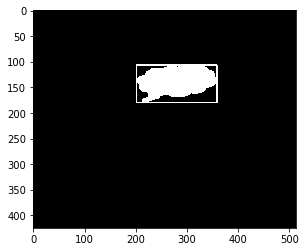

In [34]:
#绘制矩形包围框
o = cv2.imread('cc.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
x,y,w,h = cv2.boundingRect(contours[0])
#rect = cv2.boundingRect(contours[0]) 
#brcnt = np.array([[[x,y]],[[x+w,y]],[[x+w,y+h]],[[x,y+h]]])  #注意下顺序，是一个顺时针顺序，这样写是三维数组
brcnt = np.array([[x,y],[x+w,y],[x+w,y+h],[x,y+h]])#这样写也可以，是二维数组，虽然python没有数组这个概念，但可以这么理解
print(brcnt) 
cv2.drawContours(o,[brcnt],-1,(255,255,255),2)
#或者 cv2.rectangle(o,(x,y),(x+w,y+h),(255,255,255),2)
show(o)

((280.3699951171875, 138.58999633789062), (154.99778747558594, 63.78103256225586), -8.130102157592773)


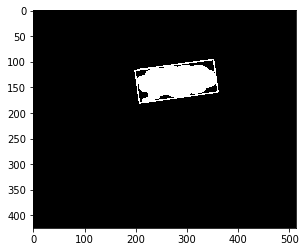

In [35]:
#最小包围矩形框
#可以发现，上面的矩形是正放的，其实最小的轮廓矩形可能是斜着的
#retval = cv2.minAreaRect(points)
#retval : 返回的矩形特征信息——（最小外接矩形的中心(x,y),(宽度，高度）,旋转角度）
#points : 指轮廓

#需要注意的是，返回值retval的结构不符合函数cv2.drawContours()的参数结构要求，需要转换
#points = cv2.boxPoints(box)
o = cv2.imread('cc.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

rect = cv2.minAreaRect(contours[0])
print(rect)

points = cv2.boxPoints(rect)
points = np.int0(points) #取整
image = cv2.drawContours(o,[points],0,(255,255,255),2)
show(image)

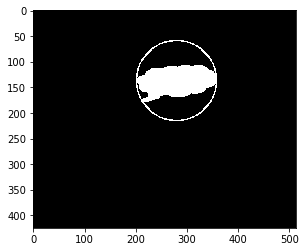

In [36]:
#最小包围圆形
#center,radius = cv2.minEnclosingCircle(points)
#center : 最小包围圆的圆心
#radius : 最小包围圆的半径
#points : 轮廓
o = cv2.imread('cc.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

(x,y),radius = cv2.minEnclosingCircle(contours[0])

center = (int(x),int(y))
radius = int(radius)
cv2.circle(o,center,radius,(255,255,255),2)
show(o)

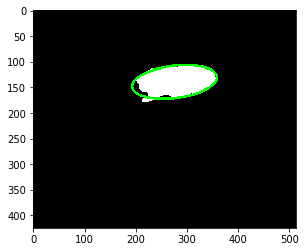

In [37]:
#最优拟合椭圆
#retval = cv2.fitEllipse(points)
#retval是RotateRect类型的值，是拟合椭圆的外接矩形

o = cv2.imread('cc.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

ellipse = cv2.fitEllipse(contours[0])
cv2.ellipse(o,ellipse,(0,255,0),3)
show(o)

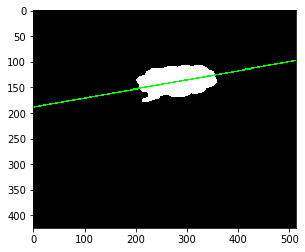

In [40]:
#最优拟合直线
#line = cv2.fitLine(points,distType,param,reps,aeps)
#distType : 距离类型，要求输入点到直线的距离和最小，对于距离下定义
#param: 距离参数，与距离类型有关
#reps : 径向精度，通常为0.01
#aeps ： 角度精度，通常为0.01

o = cv2.imread('cc.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

rows,cols = image.shape[:2] #前两个，该图像是彩色图像，是三维数组
[vx,vy,x,y] = cv2.fitLine(contours[0],cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx)+y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(o,(cols-1,righty),(0,lefty),(0,255,0),2)
show(o)

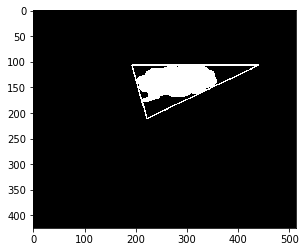

In [41]:
#最小外包三角形
#retval,triangle = cv2.minEnclosingTriangle(points)
#retval : 最小外包三角形的面积
#triangle : 最小外包三角形的三个顶点集

o = cv2.imread('cc.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

area,trg1 = cv2.minEnclosingTriangle(contours[0])

#绘制三角形，这个很酷
for i in range(0,3):
    cv2.line(o,tuple(trg1[i][0]),tuple(trg1[(i+1)%3][0]),(255,255,255),2)
show(o)

In [42]:
#逼近多边形
#approxCurve = cv2.approxPolyDP(curve,epsilon,closed)
#返回值是逼近多边形的点集
#epsilon : 精度，原始轮廓的边界点与逼近多边形边界之间的最大距离，通过不断调整，可以优化效果
#closed : True时多边形闭合

#不举例

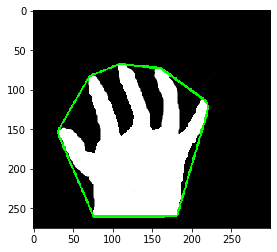

In [44]:
#凸包
#凸包是完全包含原有轮廓，并且仅由轮廓上的点所构成的多边形。凸包的每一处都是凸的。
#hull = cv2.convexHull(points[,clockwise[,returnPoints]])
#hull : 返回的凸包角点
#clockwise: 布尔类型值，True时凸包角点按照顺时针排列
#returnPoints:布尔类型，默认是True,返回坐标，False时返回轮廓中凸包角点的索引

o = cv2.imread('hand.bmp')
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
ret,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

hull = cv2.convexHull(contours[0])

cv2.polylines(o,[hull],True,(0,255,0),2) #绘制凸包

show(o)

In [45]:
#凸缺陷
#凸包与轮廓之间的部分称为凸缺陷
#convexityDefects = cv2.convexityDefects(contour,convexhull)
#返回点集，是一个数组，每一行包含的值是[起点，终点，轮廓上距离凸包最远的点，最远点到凸包的近似距离]
#前三个是索引，需要到轮廓中找
#计算凸包时，returnPoints的值必须是False